# Data exploration and preprocessing

### used modules:

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns
import numpy as np

### load dataset:

In [35]:
df = pd.read_parquet("spectrum_data_100k.parquet")

### get more insight:

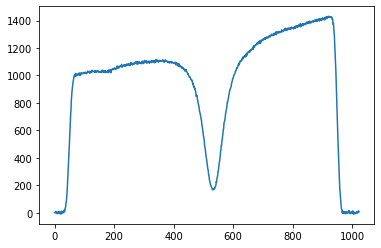

                                            spectrum  concentration
0  [-0.7966700525900023, 1.051812899165725, -3.22...          97.21
1  [4.2516158928053756, 4.311297642065483, 0.5998...           9.16
2  [2.6277027502790133, 7.421702513385412, -7.280...         184.42
3  [-9.030692948962951, -11.021414125284082, -3.8...          77.61
4  [-7.057630112337506, -4.877704649740394, -10.8...         109.02
       concentration
count  100000.000000
mean      100.033668
std        57.599289
min         0.010000
25%        50.190000
50%       100.190000
75%       149.940000
max       200.000000


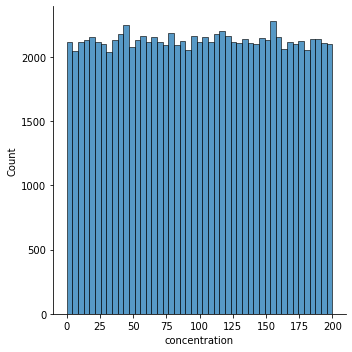

In [36]:
#  check if spectrums were created according to plan
plt.plot(df.iloc[120,0])  # print example spectrum
plt.show()

#  dataset overview
print(df.head())
print(df.describe())
sns.displot(df["concentration"])

dataset seems like it was created according to plan:
* spectrum plot looks valid
* right number of samples was created
* concentration distribution is uniform, even distrebution

### cut ramps of spectrums
the spectrums have ramps at the beginning and the end, these ramps contain no information about the gas concentration so we cut them to not impende the moddling process

In [ ]:
cut = one_or_above.copy()
cut.loc[:, "spectrum"] = cut.spectrum.map(lambda x: x[70:920])

print(cut.describe())
print(cut.head())

cut.to_parquet("spectrum_data_100k_one_and_above_cut.parquet")

In [ ]:
weighted.to_parquet("spectrum_data_100k_one_and_above_cut_weighted.parquet")

### Normalized raw data:
Using normalized data due to model performance struggeling.
Data was normalized in pycharm and imported in jupiter notebook:

In [29]:
normalized_data = pd.read_parquet("spectrum_data_100k_normalized.parquet")

plot example

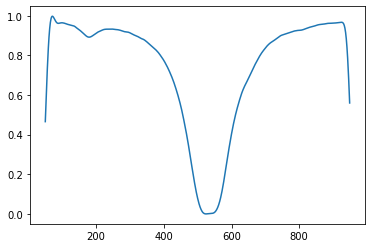

In [30]:
test = normalized_data.loc[normalized_data["concentration"] == 120]
plt.plot(test.iloc[0][0])
plt.show()

cut ramps of spectrum (repeat with normalized data):

In [31]:
normalized_data_cut = normalized_data.copy()
normalized_data_cut["spectrum"] = normalized_data_cut["spectrum"].map(lambda x: x[100:920])

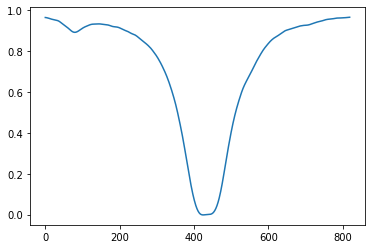

In [32]:
test = normalized_data_cut.loc[normalized_data["concentration"] == 120]
plt.plot(test.iloc[0][0])
plt.show()

In [33]:
normalized_data_cut.to_parquet("spectrum_data_100k_normalized_cut.parquet")

In [34]:
print(np.stack(normalized_data_cut['spectrum']).shape)

(100000, 820)


--> input shape and repfrence point for model construction